# Проект: "Цена питерской недвижимости"

### Описание проекта 

__Цель исследования:__  
Научиться определять рыночную стоимость объектов недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

__Ход исследования:__  
Данные нужно проверить, провести предварительную обработку. Если потребуется провести трансформацию данных - добавить новые признаки и поменять тип данных, где это необходимо. Перед этапом исследования исключить нерепрезентативные данные. Затем в ходе исследования выявить наиболее важные признаки, влияющие на формирование цены. И, наконец, предложить механизм оценки рыночной стоимости объектов недвижимости.  

Таким образом, исследование пройдёт в четыре этапа с выводом в конце:
1. Обзор данных;
2. Предобработка данных;
3. Добавление новых признаков;
4. Исследовательский анализ данных.

__Описание данных:__  
Источником данных является архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Они включают в себя следующее:

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — общая площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

### Начальный обзор данных

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# увеличение числа видимых столбцов в таблице
pd.set_option("display.max_columns", 100)

# чтение файла данных в датафрейм из папки по умолчанию и из рабочей директории
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('real_estate_data.csv', sep='\t')

Изучим общую информацию о полученном датафрейме.

In [2]:
# знакомство с данными
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [3]:
# выяснение типов данных и наличие пропусков
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Построим общую гистограмму для всех числовых столбцов таблицы.

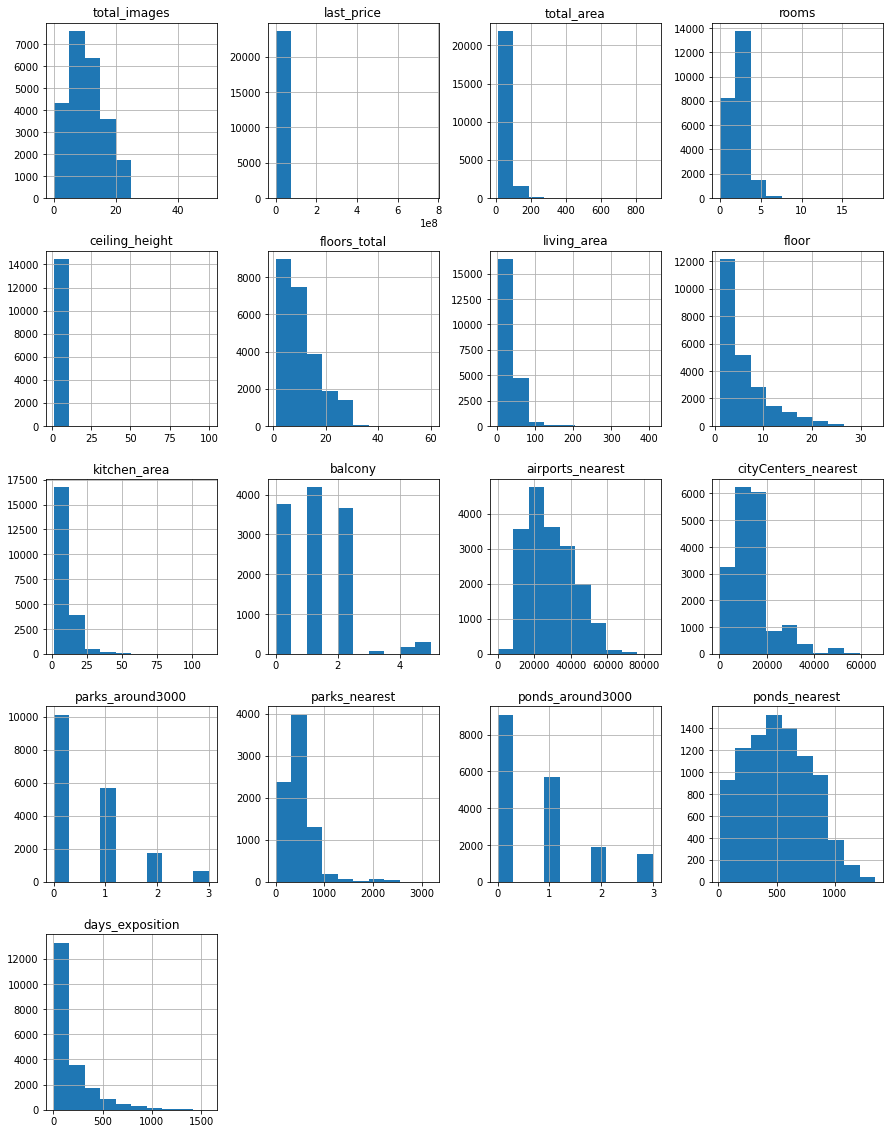

In [4]:
# гистограммы необработанных данных
data.hist(figsize=(15, 20));

__Предварительный обзор:__  
Метод `info` показал наличие в данных множества пропусков. Полупустые листы гистограмм признаков указывают на наличие аномальных значений. Ряд признаков имеет несоответствующий тип.

### Предобработка данных

#### Обработка пропусков 

Найдём и изучим пропущенные значения в столбцах. Укажем возможные причины пропусков.

In [5]:
# число пропусков в столбцах
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
# число пропусков в столбцах
(
    pd.DataFrame(100*(data.isna().mean()), columns=['Число пропусков, %'])
    .astype('int').style.background_gradient('coolwarm')
)

,"Число пропусков, %"
total_images,0
last_price,0
total_area,0
first_day_exposition,0
rooms,0
ceiling_height,38
floors_total,0
living_area,8
floor,0
is_apartment,88


In [7]:
# копия исходного датасета
df = data.copy()

In [8]:
# удаление строк для признаков с небольшим количеством пропуском
df.dropna(subset=['floors_total', 'locality_name'], inplace=True)
# # замена пропусков медианным значением
# df.loc[df['ceiling_height'].isna(), 'ceiling_height'] = df['ceiling_height'].median()
# замена пропусков фиксированными значениями
df.loc[df['is_apartment'].isna(), 'is_apartment'] = False
df.loc[df['balcony'].isna(), 'balcony'] = 0

Приведём возможные способы замены пропущенных значений.

In [9]:
# # среднее отношение жилой и полной площадей квартиры для однокомнатных квартир
# living_area_ratio = (
#     df.loc[~(df['living_area'].isna()) & (df['rooms'] <= 1), 'living_area'].median()
#     / df.loc[~(df['living_area'].isna()) & (df['rooms'] <= 1), 'total_area'].median()
# )
# # заполнение пропусков по жилой площади для однокомнатных квартир
# df.loc[(df['living_area'].isna()) & (df['rooms'] <= 1), 'living_area'] = \
# df.loc[(df['living_area'].isna()) & (df['rooms'] <= 1), 'total_area'] * living_area_ratio

# # среднее отношение жилой и полной площади квартиры для многокомнатных квартир
# living_area_ratio = (
#     df.loc[~(df['living_area'].isna()) & (df['rooms'] > 1), 'living_area'].median()
#     / df.loc[~(df['living_area'].isna()) & (df['rooms'] > 1), 'total_area'].median()
# )
# # заполнение пропусков по жилой площади для многокомнатных квартир
# df.loc[(df['living_area'].isna()) & (df['rooms'] > 1), 'living_area'] = \
#     df.loc[(df['living_area'].isna()) & (df['rooms'] > 1), 'total_area'] * living_area_ratio

In [10]:
# # среднее отношение нежилой и кухонной площадей квартиры для однокомнатных квартир
# kitchen_area_ratio = (
#     df.loc[~(df['kitchen_area'].isna()) & (df['rooms'] <= 1), 'kitchen_area'].median()
#     / (
#         df.loc[~(df['kitchen_area'].isna()) & (df['rooms'] <= 1), 'total_area'].median()
#         - df.loc[~(df['kitchen_area'].isna()) & (df['rooms'] <= 1), 'living_area'].median()
#     )
# )
# # заполнение пропусков по кухонной площади для однокомнатных квартир
# df.loc[(df['kitchen_area'].isna()) & (df['rooms'] <= 1), 'kitchen_area'] = (
#     (
#         df.loc[(df['kitchen_area'].isna()) & (df['rooms'] <= 1), 'total_area']
#         - df.loc[(df['kitchen_area'].isna()) & (df['rooms'] <= 1), 'living_area']
#     ) * kitchen_area_ratio
# )

# # среднее отношение нежилой и кухонной площадей квартиры для многокомнатных квартир
# kitchen_area_ratio = (
#     df.loc[~(df['kitchen_area'].isna()) & (df['rooms'] > 1), 'kitchen_area'].median()
#     / (
#         df.loc[~(df['kitchen_area'].isna()) & (df['rooms'] > 1), 'total_area'].median()
#         - df.loc[~(df['kitchen_area'].isna()) & (df['rooms'] > 1), 'living_area'].median()
#     )
# )
# # заполнение пропусков по кухонной площади для многокомнатных квартир
# df.loc[(df['kitchen_area'].isna()) & (df['rooms'] > 1), 'kitchen_area'] = (
#     (
#         df.loc[(df['kitchen_area'].isna()) & (df['rooms'] > 1), 'total_area']
#         - df.loc[(df['kitchen_area'].isna()) & (df['rooms'] > 1), 'living_area']
#     ) * kitchen_area_ratio
# )

In [11]:
# создание признака актуальности предложения 
df['is_actual'] = False
df.loc[df['days_exposition'].isna(), 'is_actual'] = True

In [12]:
# число пропусков в данных по близости аэропорта ислючая Санкт-Петербург
print('Число потенциально восстановимых пропусков в столбце "airports_nearest":',
      len(data[(data['locality_name'] != 'Санкт-Петербург') & (data['airports_nearest']).isna()]))

Число потенциально восстановимых пропусков в столбце "airports_nearest": 5457


In [13]:
# проверка замены пропусков
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
is_actual                   0
dtype: int64

__Замены в пропусках:__  
В качестве типичных значений признаков принимаем медианные, так как данные еще не очищены от выбросов.
1. Строки с пропусками в `floors_total` удалены, так как их немного. В этих строках часто присутствует указание этажа расположения квартиры и можно было бы на этой основе реконструировать информацию об этажности здания. 
2. Строки с пропусками в `locality_name` удалены, так как их немного. Возможно продавец по умолчанию предполагал город Санкт-Петербург, но лучше не гадать, так как это очевидно важный признак.
3. Пропуски в `ceiling_height` можно было бы заменить усредненными значениями. Тем более, что высота потолков, в основном, варьирует незначительно - в пределах 10 см. Однако, данные отсутствуют чуть ли не в половине случаев и это внесет существенное искажение в общую картину. Поэтому пропуски оставлены без изменения. Отсутствие информации о высоте потолков связано либо с тем, что продавец квартиры не посчитал важной эту информацию, либо предпочел о ней умолчать. В обоих случаях можно предположить, что квартира типовая, с невысоким потолком. Не исключено также, что потолки в разных помещениях, вообще, имеют разную высоту.
4. Пропуски в `is_apartment` заменены на `False`. Доля апартаментов не велика, и если продавец не указал на это особо, то речь идет об обычной квартире.
5. Пропуски в `balcony` заменены на `0`. Если продавец не указал число балконов - вероятно, их нет.
6. Доля пропусков в `living_area` составляет менее 1/10, между общей площадью и площадью жилой зоны сильная зависимость и данные по ней могут быть реконструированы. Вариант такой реконструкции: значения вычисляются отдельно для однокомнатных и многокомнатных квартир; площадь жилой зоны определяется на основе средней доли жилой и полной площади, рассчитанных по медианным значениям:


$$S_{living\ area} = S_{total\ area} \times \frac{S_{living\ area\ median}}{S_{total\ area\ median}}$$


    Ситуация с `kitchen_area` аналогична. Но связь с общей площадью не такая явная. Вариант реконструкции: значения вычисляются отдельно для однокомнатных и многокомнатных квартир; площадь кухни определяется на основе средней доли кухонной и нежилой площади, рассчитанных по медианным значениям:


$$S_{kitchen\ area} = (S_{total\ area} - S_{living\ area}) \times \frac{S_{kitchen\ area\ median}}{S_{total\ area\ median}-S_{living\ area\ median}}$$

    Во избежание искажений результатов анализа пропуски в данных и для `living_area` и для `kitchen_area` остаются.  
7. Пропуски в `days_exposition` оставим без изменений. Возможно, они связаны с тем, что предложение по продаже все еще актуально. На это указывают более свежие даты размещения объявлений. В основном, - это 2019 год. При этом значения типа `NaN` не мешают выполнению математических манипуляций с данными или построению гистограмм. Кроме того, был добавлен дополнительный признак 
`is_actual` булевого типа.
8. Без указания точного местоположения, все локальные признаки - `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest` - не подлежат восстановлению. Близость к парку или шум пролетающих самолетов могут иметь решающее значение при покупке квартиры - соответственно, они влияют на ее цену. Заменить локальные признаки усредненными показателями нельзя. Пропуски в них останутся без изменений. Исключение можно сделать только для 
`airports_nearest` в отношении небольших населенных пунктов.

__Замечание по пропускам:__  
В данных осталось много пропущенных значений в виде `NaN`. Они относятся к действительному типу данных и не мешают построению гистограмм и их анализу.

#### Смена типов данных

Рассмотрите типы данных в каждом столбце. Преобразуем тип данных, где это необходимо. Приведём пояснения.

In [14]:
# преобразование типов признаков
df['is_apartment'] = df['is_apartment'].astype('bool')
df['balcony'] = df['balcony'].astype('int64')
df['floors_total'] = df['floors_total'].astype('int64')
df['first_day_exposition'] = df['first_day_exposition'].astype('datetime64')

# проверка преобразования
print('Тип данных в столбце "is_apartment":', df['is_apartment'].dtype,
      '\nТип данных в столбце "balcony":', df['balcony'].dtype,
      '\nТип данных в столбце "floors_total":', df['floors_total'].dtype,
      '\nТип данных в столбце "first_day_exposition":', df['first_day_exposition'].dtype
     )

Тип данных в столбце "is_apartment": bool 
Тип данных в столбце "balcony": int64 
Тип данных в столбце "floors_total": int64 
Тип данных в столбце "first_day_exposition": datetime64[ns]


__Проведённые преобразование типов:__  
1. Признак `is_apartment`("является ли апартаментом") преобразован к типу `bool`, так как состоит из булевых значений.
2. Признак `floors_total`("этажность дома") преобразован в целочисленный тип.
3. Признак `days_exposition`("число дней размещения объявления о продаже") содержит значения `NaN`действительного тип `float64`, поэтому к целочисленному типу не преобразуется
4. Признак `first_day_exposition`("дата публикации") преобразован из строкового в формат даты.

#### Устранение дубликатов

Проверим наличие дублирующихся строк. Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты.

In [15]:
# подсчет строк-дубликатов
print('Количество дублирующихсы строк данных:', df.duplicated().sum())

Количество дублирующихсы строк данных: 0


In [16]:
# просмотр названий населенных пунктов
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [17]:
# функция возвращает название и тип населенного пункта
def only_name(name, get_type=False):
    only_name = ''
    is_city = False
    for i in range(len(name)):
        # поиск названия по верхнему регистру
        if name[i].isupper():
            only_name = name[i:]
            # отсутствие уточнения о типе населенного пункта
            if i == 0:
                is_city = True
            break
    if get_type == True:
        return is_city
    return only_name

In [18]:
# создание признако, содержащее только название населенного пункта
df['locality_only_name'] = df['locality_name'].apply(only_name)
#  создание признако, указывающее на тип населенного пункта
df['is_city'] = df['locality_name'].apply(only_name, get_type=True)

__Замечания по устранению дубликатов:__  
В данных не оказалось явных дубликатов, но неявные - присутствуют в столбце `'locality_name'`. В нем указаны полные названия городов и поселков. Причем, если это небольшое поселение, то сначала строчными буквами указывается его тип. А, собственно, название всегда начинается с заглавной буквы. Эти особенности были взяты на вооружение и была создана функцию, которая возвращает либо _только название_, либо только _тип населенного пункта_. С помощью нее созданы два новых признака - `'locality_only_name'` и `'is_city'`. Одновременно удалось избавиться от неявных дубликатов  (типа: _"поселок"_, _"посёлок"_, _"поселок городского типа"_) в названиях типов поселений. 

In [19]:
# восстановление пропусков в столбце расстояния до ближайшего аэропорта
print('Число потенциально восстановимых пропусков в столбце "airports_nearest":', df['airports_nearest'].isna().sum())
villages = df.loc[df['is_city'] == False, 'locality_only_name'].unique()
for village in villages:
    df.loc[(df['locality_only_name'] == village) & (df['airports_nearest'].isna()), 'airports_nearest'] = \
    df.loc[(df['locality_only_name'] == village) & (~df['airports_nearest'].isna()), 'airports_nearest'].median()
print('Число восстановленных пропусков в столбце "airports_nearest":', df['airports_nearest'].isna().sum())

Число потенциально восстановимых пропусков в столбце "airports_nearest": 5524
Число восстановленных пропусков в столбце "airports_nearest": 5521


__Восстановление локальных признаков:__  
Восставить пропуски в столбце `airports_nearest` для небольших населенных пунктов предполагалась за счет имеющихся данным по ним. Из-за отсутствия таковых, в основном, этого сделать не удалось.

#### Устранение аномалий в данных

Найдём и устраним редкие и выбивающиеся значения. Для этого построим диаграмму размах для признаков. Попробуем восстановить данных, где это возможно.

In [20]:
# статистика по числовым данным
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,14481.000000,23565.000000,21700.000000,23565.000000,21343.000000,23565.000000,18044.000000,18064.000000,18065.000000,8030.000000,18065.000000,9036.000000,20394.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.771283,10.675875,34.454822,5.878124,10.560994,0.593677,28795.192308,14192.656056,0.611569,490.580448,0.769499,518.289509,180.741395
std,5.681156,1.091093e+07,35.657060,1.078591,1.261983,6.594823,22.045359,4.871485,5.900630,0.960660,12632.300179,8613.348153,0.802088,341.572956,0.938669,278.009558,219.732782
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.510000,5.000000,18.600000,2.000000,7.000000,0.000000,18557.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26755.500000,13096.500000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [21]:
# статистика по строковым данным
df.describe(include=[object])

,locality_name,locality_only_name
count,23565,23565
unique,364,305
top,Санкт-Петербург,Санкт-Петербург
freq,15651,15651


In [30]:
# копия данных
df_scaled = df.copy()
# только числовые столбцы
col_to_pic = []
for col in df.columns:
    if df_scaled[col].dtype == 'int' or df_scaled[col].dtype == 'float':
        col_to_pic.append(col)        
        # стандартизация числовых значений
        df_scaled[col]  = df_scaled[col] / df_scaled[col].max()

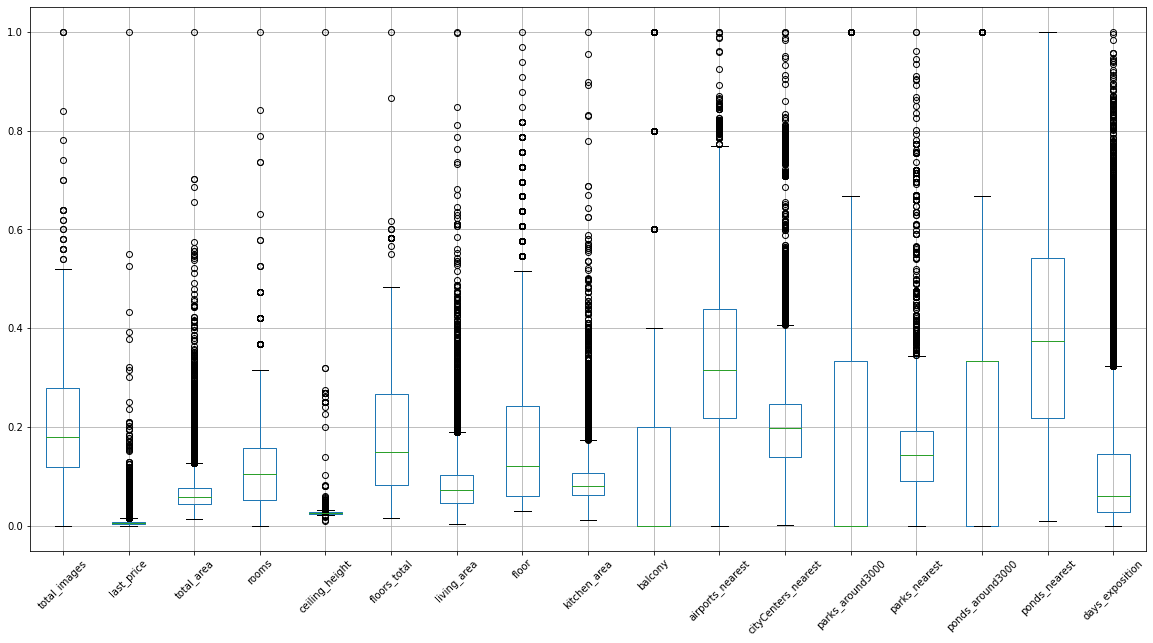

In [31]:
# диаграмма размаха числовых признаков
df_scaled[col_to_pic].boxplot(figsize=(20,10), rot=45);

In [32]:
# исправление некорректных данных о высоте полтолков
df['ceiling_height'] = df['ceiling_height'].where(df['ceiling_height'] < 20, df['ceiling_height'] / 10)
# исправление некорректных данных о цене увартиры
df['last_price'] = df['last_price'].where(df['last_price'] > 100000, df['last_price'] * 1000)
# исправление некорректных данных о числе комнат
df['rooms'] = df['rooms'].where(df['rooms'] > 0, 1)
# исправление некорректных данных о расстоянии до ближайшего аэропорта
df['airports_nearest'] = df['airports_nearest'].where(df['airports_nearest'] > 1000, np.nan)

# удаление аномалий в данных о количестве этажей
df['floors_total'] = df.query('floors_total < 50')['floors_total']
# удаление аномалий в данных о высоте полтолков
df['ceiling_height'] = df.query('ceiling_height >= 2 and ceiling_height < 7')['ceiling_height']
# удаление аномалий в данных о площади жилой зоны
df['living_area'] = df.query('living_area >= 8')['living_area']
# удаление аномалий в данных о площади кухни
df['kitchen_area'] = df.query('living_area >= 1.8')['kitchen_area']
# удаление аномалий в данных о расстоянии до ближайшего парка
df['parks_nearest'] = df.query('parks_nearest >= 10')['parks_nearest']

__Замечания по устранению аномалий:__
Аномалии в данных - единичны. Для анализа требуется удаление большего числа нерепрезентативных данных.  

Отмеченные анамалии в данных:  
1. В столбце `ceiling_height` среди значений высоты потолка встречаются повторяющиеся значения в 27.0 и 32.0. Причем параметры площади, цены, этажности квартиры говорят о том, что она достаточно стандартна. Так что, высота потолка в этих случаях заменена на очевидные значения в 2.7 и 3.2 м. Среди квартир со средней ценой и площадью встречаются аномальные значения высоты: 1 м. и более 8 м. - они удалены как неправдоподобные. 
1. Аномальное значение цены в столбце `last_price` 12 190.0 р. за квартиру в 109 кв.м заменено на 12 190 000 р.
2. В столбце `rooms` много нулевых значений. Такое указание числа комнат характерно для квартир-студий. Значение было заменено на 1.
4. В столбце `floors_total` удалены данные с количеством этажей выше 50 как неправдоподобные.
5. В столбце `living_area` удалены данные с площадью жилой зоны менее 8 кв.м как неправдоподобные.
6. В столбце `kitchen_area` удалены данные с площадью кухни менее 1.8 кв.м как неправдоподобные.
7. В столбце `airports_nearest` заменены некорректные данные о расстоянии до ближайшего аэропорта на `NaN`.
8. В столбце `parks_nearest`удалены данные о расстоянии до ближайшего парка менее 10 м. как неправдоподобные.

In [33]:
# функция обрезки выбросов
def cut_outliers(dt):
    for col in dt.columns:
        if dt[col].dtypes == 'int64' or dt[col].dtypes == 'float64':
            # расчет процентилей
            quantiles = dt[col].quantile(q=[.01, .99])
            dt[col] = dt.loc[(dt[col] >= quantiles.iloc[0]) & (dt[col] <= quantiles.iloc[1]), col]
    return dt
# обрезка выбросов для выбранных признаков
df = cut_outliers(df)

__Удаление редких данных:__  
Для анализа гистограмм недостаточно удалить аномалии. Многие признаки имеют длинные правые "хвосты". Отбросим их, обрезав 99-ым процентилем по каждому признаку в отдельности. Дальнейший анализ проведем с уже урезанными данными

### Создание новых признаков

Создадим следующие новые признаки на основе существующих и добавим их в таблицу:
* цена одного квадратного метра;
* день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
* месяц публикации объявления;
* год публикации объявления;
* тип этажа квартиры (значения — «первый», «последний», «другой»);
* расстояние до центра города в километрах.

In [34]:
# создание столбца с ценами за кв.т
df['price_m2'] = df['last_price'] / df['total_area']
# создание столбца с днем публикации объявления
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday
# создание столбца с месяцем публикации объявления
df['month_exposition'] = df['first_day_exposition'].dt.month
# создание столбца с годом публикации объявления
df['year_exposition'] = df['first_day_exposition'].dt.year

In [35]:
# создание столбца с растоянием до центра города в километрах
df['cityCenters_nearest_km'] = df['cityCenters_nearest'] // 1000
df[df['cityCenters_nearest_km'] == 0] = 1
#df['cityCenters_nearest_km'].astype('int64')

In [36]:
# создание столбца с типами этажей
df['floor_type'] = 'другой'
df.loc[df['floor'] == 1, 'floor_type'] = 'первый'
df.loc[~(df['floor'] == 1) & (df['floor'] == df['floors_total']), 'floor_type'] = 'последний'

__Список добавленных столбцов:__  
Ниже все новые столбцы, добавленные на разных этапах проекта.
* `price_m2` - цена одного квадратного метра;
* `weekday_exposition` - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
* `month_exposition` - месяц публикации объявления;
* `year_exposition` - год публикации объявления;
* `floor_type` - тип этажа квартиры (значения — «первый», «последний», «другой»);
* `cityCenters_nearest_km` - расстояние до центра города в километрах;
* `is_actual`- предположительно, актуальная продажа;
* `locality_only_name`- название населенного пункта без указания типа;
* `is_city`- тип населенного пункта.   

### Исследовательский анализ данных

#### Изучение параметров объектов недвижимости

Изучим следующие параметры объектов:
* общая площадь;
* жилая площадь;
* площадь кухни;
* цена объекта;
* количество комнат;
* высота потолков;
* этаж квартиры;
* тип этажа квартиры («первый», «последний», «другой»);
* общее количество этажей в доме;
* расстояние до центра города в метрах;
* расстояние до ближайшего аэропорта;
* расстояние до ближайшего парка;
* день и месяц публикации объявления.


Построим отдельные гистограммы для каждого из этих параметров. Опишем наши наблюдения по параметрам.

In [37]:
# признаки для построения гистограмм
cols_to_hist = ['total_area',
                'living_area',
                'kitchen_area',
                'last_price',
                'rooms',
                'ceiling_height',
                'floor',                
                'floor_type',
                'floors_total',
                'cityCenters_nearest',
                'airports_nearest',
                'parks_nearest',
                'weekday_exposition',
                'month_exposition']
# число корзин для выбранных признаков
bin_var = [30, 20, 20, 23, 4, 15, 15, 3, 19, 25, 15, 25, 7, 12]
range_var1 = [10, 10, 5, 2e6, 1, 2.25, 0, 0, 2, 0, 5e3, 0, 0, 0]
range_var2 = [160, 90, 25, 2.5e7, 5, 3.75, 15, 3, 21, 3.5e4, 5e4, 1e3, 7, 12]

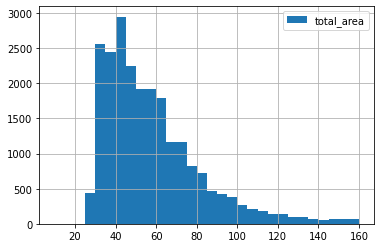

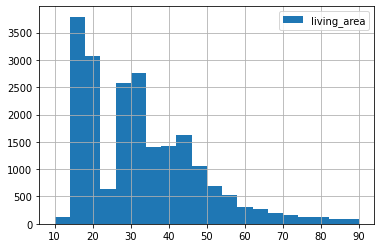

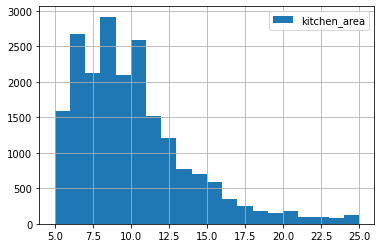

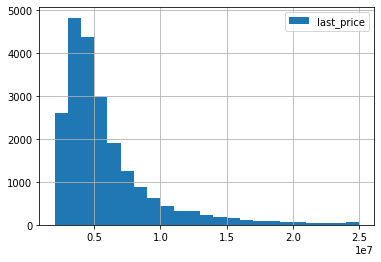

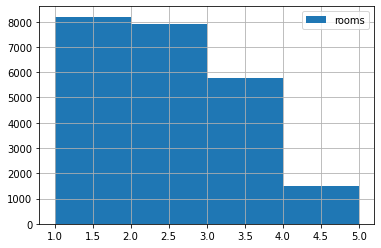

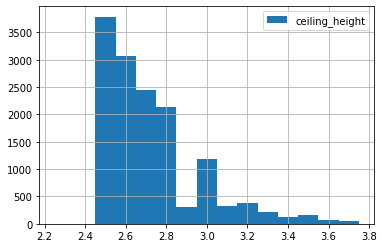

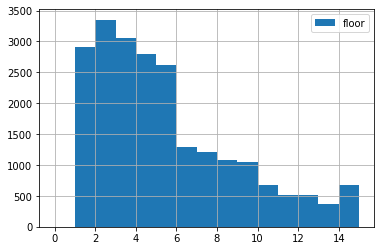

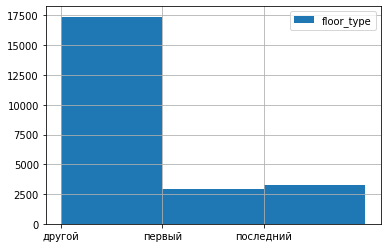

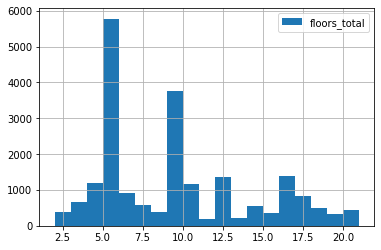

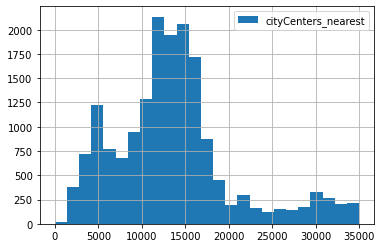

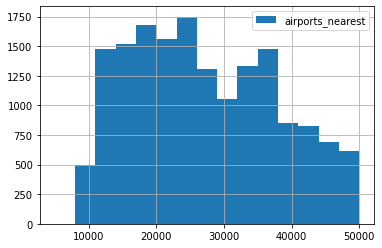

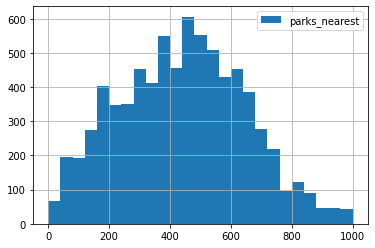

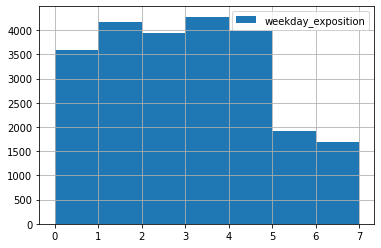

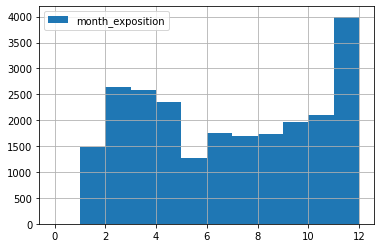

In [38]:
# гистограммы обработанных данных
for i in range(len(cols_to_hist)):
    df[cols_to_hist[i]].hist(bins=bin_var[i], range=(range_var1[i], range_var2[i]), legend=[cols_to_hist[i]]);
    plt.show()

__Описание характера гистограмм:__  
* Наибольшее число продаваемых квартир имеет площадь от около 40 кв.м. С ростом метража предложение постепенно уменьшается, а после 130-140 кв.м оно крайне незначительно.
* Гистограмма жилой площади в целом повторяет график полной, но имеет выраженный провал, что объясняется резкой разницей в площади наиболее популярных одно- и двухкомнатных квартир.
* У площади кухни таких провалов нет, но существует минимальный размер кухни - около 5 м. Наиболее типичный размер кухни около 8 кв.м. Это объясняется тем, что у большинства типовых квартир площадь кухни примерно одинакова, вне зависимости от числа комнат и общей площади. Перед вторичным пиком около 10 кв.м наблюдается спад. Возможно, тут проходит разделение между бюджетным и более комфортабельным жильем.
* Гистограмма цены представляет собой типичное пуассоновское распределение с длинным правым "хвостом". Что характерно и для трех предыдущих графиков. Типичная цена составляет 4-5 млн.р.
* По гистограмме с числом комнат видно, что преобладают одно- и двухкомнатные квартиры. Предложения по квартирам Число квартир с 4 комнатами и более невелико.
* Высота потолков в квартире изменяется достаточно незначительно. В подавляющем большинстве высота составляет около 2.5 м. Вторичный пик приходится на высоту около 3 м, которая вероятно приходится на жилье повышенной комфортности.
* Характер графика этажа расположения квартиры ниспадающий. Он показывает два резкий спад после 5 - возможно, это границы разделения для пятиэтажных зданий.
* На графике типа этажа предсказуемо преобладает типа этажа "другой", поскольку дома в большинстве многоэтажные. Первый и последний этажи показывают схожие, и куда меньшие показатели.
* Гистограмма числа этажей показывает два снижающихся пика, отмечающих 5-ти и 9-тиэтажные здания.
* График расстояния до центра показывает два растущих пика около 5 и 12 км и резкий спад после 17. Так как предложения о продаже жилья, в основном, из самого Санкт-Петербурга, то они, по-видимому, объясняются особенностями месторасположения спальных районов. Кроме того, график показывает, что предложения по жилью в самом центре города тоже достаточно.
* Гистограмма расстояния до ближайшего аэропорта показывает увеличение предложения по мере удаленности от аэропортов и  достигает пика около 25 км. Его можно объяснить нежеланием покупать жилье рядом с аэропортом из-за самолетного гула. После вторичного, более низкого пика в 35 км начинается спад, связанный, видимо, с выходом за городскую черту и общим снижением отсутствием предложения. Около 30 км на графике видна впадина - не исключено, что здесь зона наложения влияние нескольких аэропортов.
* Гистограмма расстояния до ближайшего парка почти симметрична. Она показывает, что парки, в основном, не далее полукилометра от дома. Связано это, возможно, не столько с предпочтениями покупателей, сколько с особенностями архитектурного планирования жилой застройки.
* График размещения объявлений по дням недели демонстрирует спад на выходных.
* График размещения объявлений по месяцам демонстрирует спад в январе и мае, резкий пик в декабре. Здесь очевидная связь с затяжными праздниками, предновогодними покупками и подведением итогов года.

#### Изучение характера продажи квартир

Изучим, как быстро продавались квартиры (столбец `days_exposition`). Этот параметр показывает, сколько дней было размещено каждое объявление. Опишем, сколько времени обычно занимает продажа. Ответим на вопрос: "Какие продажи можно считать быстрыми, а какие — необычно долгими?"

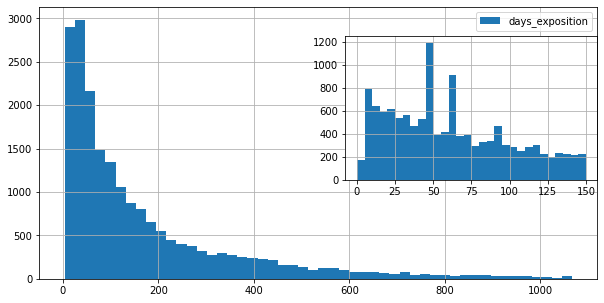

In [39]:
# гистограмма срока продажи
df['days_exposition'].hist(figsize=(10, 5), bins=50, legend='days_exposition')
plt.axes([.55, .4, .35, .4])
# гистограмма выборки сроком менее 200 дней
df['days_exposition'].hist(bins=30, range=(0, 150));

In [40]:
# среднее и медиана рассчитаны по полным данным
days_mean = data['days_exposition'].mean()
days_median = data['days_exposition'].median()
print(f'Средний срок продажи: {days_mean:.0f} дней\nМедианный срок продажи: {days_median:.0f} дней')

Средний срок продажи: 181 дней
Медианный срок продажи: 95 дней


__Описание характера срока продажи:__  
Типичное (медианное) время продажи квартиры составляет около 3 мес. График срока продаж сильно растянут вправо - это ведет к увеличению среднего срока продажи до полугода. Продажи длящиеся более данного периода можно считать _необычно долгими_. Наиболее интенсивные продажи происходят в первый же месяц. Повторный и даже более высокий пик появляется на второй месяц - продажи в течение этого срока можно полгать _быстрыми_. Возможно, такая активность связана с деятельностью риэлтеров, а 2 мес. рассматривается как, своего рода, дедлайн.

#### Изучение основных факторов, влияющих на цену недвижимости

Посмотрим какие факторы больше всего влияют на общую (полную) стоимость объекта. Изучим, зависит ли цена от:
* общей площади;
* жилой площади;
* площади кухни;
* количества комнат;
* этажа, на котором расположена квартира («первый», «последний», «другой»);
* даты размещения (день недели, месяц, год).  


Построим графики, показывающие зависимость цены от указанных выше параметров.

In [41]:
# матрица корреляции 
df.corr().round(2).style.background_gradient('coolwarm')

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,weekday_exposition,month_exposition,year_exposition,cityCenters_nearest_km
total_images,1.000000,0.140000,0.110000,0.100000,0.030000,0.010000,0.110000,0.030000,0.090000,0.040000,0.010000,-0.030000,0.020000,-0.010000,-0.010000,-0.010000,-0.010000,0.140000,-0.010000,-0.000000,0.140000,-0.030000
last_price,0.140000,1.000000,0.780000,0.480000,0.520000,0.050000,0.670000,0.060000,0.580000,0.030000,-0.030000,-0.350000,0.200000,-0.010000,0.190000,-0.100000,0.110000,0.700000,-0.020000,0.000000,-0.030000,-0.340000
total_area,0.110000,0.780000,1.000000,0.770000,0.490000,-0.040000,0.920000,-0.020000,0.550000,0.030000,-0.030000,-0.250000,0.160000,-0.030000,0.170000,-0.090000,0.140000,0.170000,-0.020000,0.010000,-0.080000,-0.250000
rooms,0.100000,0.480000,0.770000,1.000000,0.240000,-0.210000,0.870000,-0.150000,0.190000,0.000000,-0.060000,-0.170000,0.120000,-0.060000,0.080000,-0.040000,0.110000,-0.060000,-0.000000,0.000000,-0.060000,-0.170000
ceiling_height,0.030000,0.520000,0.490000,0.240000,1.000000,-0.070000,0.410000,-0.040000,0.440000,-0.060000,-0.110000,-0.400000,0.280000,-0.090000,0.250000,-0.160000,0.110000,0.360000,-0.020000,0.000000,-0.110000,-0.390000
floors_total,0.010000,0.050000,-0.040000,-0.210000,-0.070000,1.000000,-0.160000,0.660000,0.240000,0.170000,0.150000,0.040000,-0.250000,0.130000,-0.140000,0.060000,-0.060000,0.230000,0.010000,0.010000,0.010000,0.040000
living_area,0.110000,0.670000,0.920000,0.870000,0.410000,-0.160000,1.000000,-0.110000,0.340000,0.000000,-0.050000,-0.230000,0.170000,-0.060000,0.140000,-0.060000,0.140000,0.070000,-0.010000,-0.000000,-0.070000,-0.230000
floor,0.030000,0.060000,-0.020000,-0.150000,-0.040000,0.660000,-0.110000,1.000000,0.180000,0.170000,0.090000,0.020000,-0.160000,0.090000,-0.080000,0.040000,-0.040000,0.180000,0.010000,0.020000,0.010000,0.020000
kitchen_area,0.090000,0.580000,0.550000,0.190000,0.440000,0.240000,0.340000,0.180000,1.000000,0.060000,0.010000,-0.190000,0.070000,0.020000,0.150000,-0.090000,0.090000,0.340000,-0.010000,0.020000,-0.060000,-0.180000
balcony,0.040000,0.030000,0.030000,0.000000,-0.060000,0.170000,0.000000,0.170000,0.060000,1.000000,0.060000,0.070000,-0.080000,0.030000,-0.040000,0.020000,-0.020000,0.030000,-0.000000,0.010000,0.000000,0.070000


In [42]:
# признаки для построения графиков
cols_to_plot = ['total_area',
                'living_area',
                'kitchen_area',
                'rooms',
                'floor_type',
                'weekday_exposition',
                'month_exposition',
                'year_exposition']

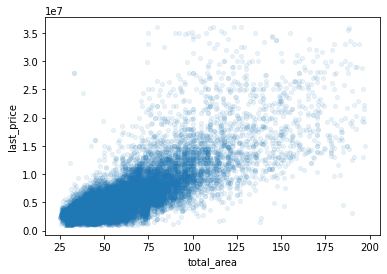

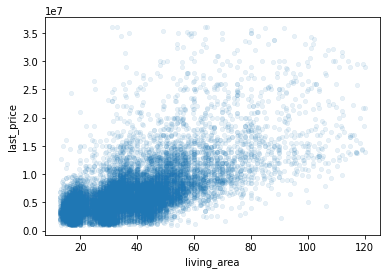

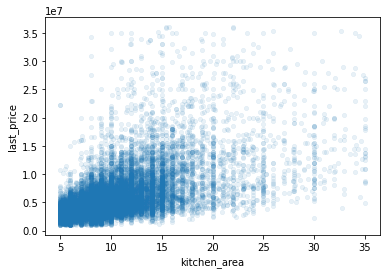

In [43]:
# графики зависимости цены от площади квартиры
for col in cols_to_plot[:3]:
    df.plot(x=col, y='last_price', kind='scatter', alpha=0.1, linewidths=0.5);
    #df.plot(x=col, y='last_price', kind='hexbin', gridsize=15, cmap='Blues');
    plt.show()

In [44]:
# цена по всем вариантам количества комнат
#data.query('last_price < 1e8').pivot_table(index='rooms', values='last_price', aggfunc='median').plot(kind='bar', rot=0);

In [45]:
# число квартир с большим числом комнат
#print('Число квартир с большим числом комнат:', data.query('rooms > 10')['last_price'].count())

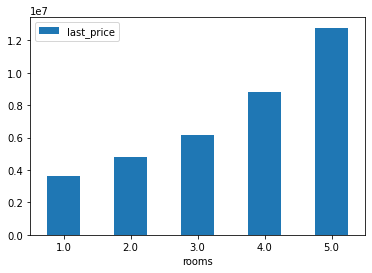

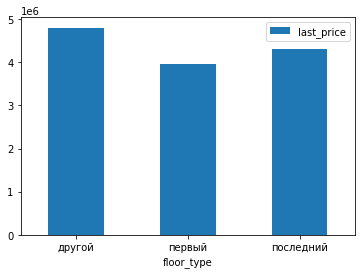

In [46]:
# графики зависимости цены от числа комнат и типа этажа
for col in cols_to_plot[3:5]:    
    df.pivot_table(index=col, values='last_price', aggfunc='median').plot(kind='bar', rot=0)
    plt.show()

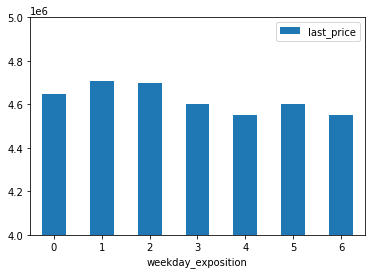

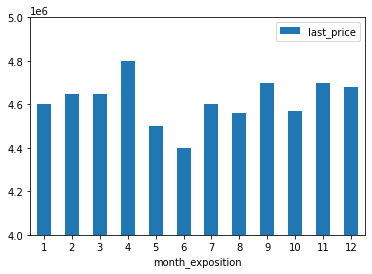

In [47]:
# графики зависимости цены от временных факторов
for col in cols_to_plot[5:-1]:    
    df.pivot_table(index=col, values='last_price', aggfunc='median').plot(kind='bar', rot=0, ylim=(4e6, 5e6))
    plt.show()

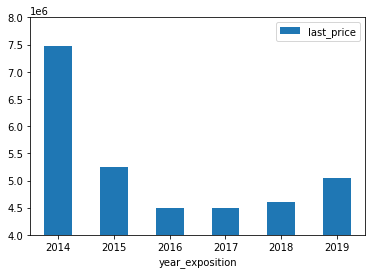

In [48]:
# графики зависимости цены от временных факторов
for col in cols_to_plot[7:]:    
    df.pivot_table(index=col, values='last_price', aggfunc='median').plot(kind='bar', rot=0, ylim=(4e6, 8e6))
    plt.show()

__Обзор диаграмм:__  
* Все три диаграммы рассеяния показываю прямую зависимость между ростом площади и стоимости. Для общей площади такая связь более выражена, чем для жилой или кухонной. На ней видна зона интенсивных продаж бюджетного жилья. Такие же зоны присутствуют на и на остальных диаграммах. На графике жилой площади выделяются 3 зоны - речь, вероятно, о различном числе комнат. Диаграмма выглядит разлинованной - не исключено, что размер кухни просто округляли.
* Так как увеличение площади часто сопровождается увеличением количества комнат, то и между этим показателем и стоимостью жилья прямая зависимость. Но это характерно прежде всего для бюджетного жилья.
* Тип этажа меньше влияет на цену, но покупатели квартир стараются избегать проходные первые этажи.
* День недели и месяц публикации также незначительно влияют на стоимость. В начале трудовой недели цена немного выше, чем в конце. На графике месячной завис мисти заметен рост перед майскими праздниками и дальнейшее падение вплоть до июля. 
* Диаграмма года публикации показывает резкое падение цен на жилье в 2015 году и дальнейшую стабилизацию. Здесь прослеживается влияние изменений в политико-экономической ситуации.

__Анализ корреляционных связей:__  
При обзоре корреляционной матрицы выяснилось, что наибольшая положительная связь цена имеет с общей площадью и тесно связанными с ней параметрами - жилой площадью и числом комнат. Фактически общую площадь уже можно рассматривать в качестве основного компонента при оценке недвижимости. Но, чтобы не оперировать абсолютными величинами и не строить пропорции, лучше перейти к условным единицам. У нас уже есть такой признак - цена за кв.м. Он, как и предполагалось, имеет низкую корреляцию с площадью и высокую - с ценой. Теперь, если рассмотреть уже этот признак, обнаружиться его достаточная обратная корреляция с расстоянием от центра города. А она в свою очередь слабо корригируется с площадью. Таким образом получены два независимых, универсальных и масштабируемых признака, которые позволяют оценить приблизительную цену квартиры.

#### Расчёт средней цены одного квадратного метра

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [49]:
# 10 населённых пунктов с наибольшим числом объявлений
most_part_ann = (
    df.groupby('locality_only_name')['locality_only_name']
    .count()
    .sort_values(ascending=False)[:10]
    .index.to_list()
)
most_part_ann

['Санкт-Петербург',
 'Мурино',
 'Кудрово',
 'Шушары',
 'Всеволожск',
 'Пушкин',
 'Колпино',
 'Парголово',
 'Гатчина',
 'Выборг']

In [50]:
# средняя цена кв.м в топе городов
mean_price_m2 = (
    df.query('locality_only_name in @most_part_ann')
    .groupby('locality_only_name')['price_m2'].mean()
    .sort_values(ascending=False)
)

In [51]:
print(f'Самая высокая цена за кв.м: {mean_price_m2.index[0]:>16} - {mean_price_m2.max():.1f} т.р.')
print(f'Самая низкая цена за кв.м: {mean_price_m2.index[-1]:>17} - {mean_price_m2.min():.1f} т.р.')

Самая высокая цена за кв.м:  Санкт-Петербург - 111053.3 т.р.
Самая низкая цена за кв.м:            Выборг - 58308.0 т.р.


In [52]:
df.groupby('locality_name').agg({'balcony':'count', 'last_price':'median'}) \
    .sort_values(by = 'balcony', ascending = False) \
    .head(10)

,balcony,last_price
locality_name,,
Санкт-Петербург,15651,5500000.0
посёлок Мурино,520,3400000.0
посёлок Шушары,439,3950000.0
Всеволожск,398,3450000.0
Пушкин,369,5165000.0
Колпино,338,3600000.0
посёлок Парголово,327,4100000.0
Гатчина,307,3100000.0
деревня Кудрово,299,3790000.0


In [53]:
# населенные пункты с наибольшим числом числом предложений и наиболее высокой ценой за кв.м
df.groupby('locality_only_name').agg({'last_price':'count', 'price_m2':'mean'}) \
    .sort_values(by = 'last_price', ascending = False) \
    .head(10)

,last_price,price_m2
locality_only_name,,
Санкт-Петербург,15418,111053.280925
Мурино,586,85156.107741
Кудрово,470,94574.034683
Шушары,439,78152.198817
Всеволожск,397,68694.149934
Пушкин,368,103077.242205
Колпино,337,75239.590783
Парголово,327,90430.721268
Гатчина,306,68935.194838


#### Расчёт средней цены для километра отдалённости от центра города

Ранее мы посчитали расстояние до центра в километрах. Теперь выделим квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислим среднюю цену каждого километра. Опишем, как стоимость объектов зависит от расстояния до центра города.

In [54]:
# расчет средней цены кв.м в зависимости от удаленности от центра
km_price = []
# определение максимального расстояния от центра
for km in range(1, int(df.query('locality_only_name == "Санкт-Петербург"')['cityCenters_nearest_km'].max())+1):
    # среднее по выборке цены
    km_price.append([km, df.query('locality_only_name == "Санкт-Петербург" and cityCenters_nearest_km == @km')['price_m2'].mean()])
km_price = pd.DataFrame(km_price, columns=['Расстояние до центра города', 'Средняя цена за кв.м'])
km_price.dropna(inplace=True)
km_price

,Расстояние до центра города,Средняя цена за кв.м
0,1,143746.878451
1,2,121570.535534
2,3,120108.173762
3,4,132351.814503
4,5,134820.305981
5,6,136189.508781
6,7,129504.662429
7,8,119658.476151
8,9,109664.626941
9,10,110851.741114


__Пояснения к данным:__  
Среди данных расстояния до центра города оказались некоторые выбивающиеся значения. Оказалось, что это единичные предложения и их можно убрать. Кроме того, стоит учитывать тот факт, что наибольшая протяженность Санкт-Петербурга составляет 44 км, а значит примерный радиус, захватывающий всю площадь города составляет 22 км. Так что, нижние строчки списка - это уже загородная недвижимость, и продаваться здесь могут самые разные объекты.

In [55]:
# удаление выбросов
km_price = km_price[:22]

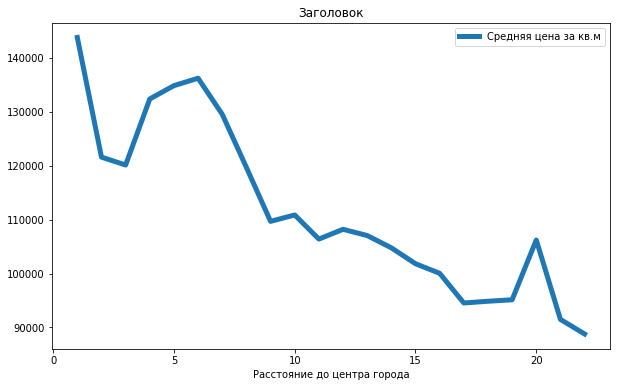

In [56]:
km_price.plot(x='Расстояние до центра города', y='Средняя цена за кв.м', figsize=(10, 6), linewidth=5, title = 'Заголовок');

### Общий вывод

__Вывод по обработке данных:__  
Исходные данные наждались в значительной предварительной обработке, содержали аномалии, ошибки записи и большое количество пропусков. Некоторым столбцым требовалось сменить тип данных, в частности, столбец `first_day_exposition` получил тип даты. Немногочисленные ошибки и аномалии были устранены. Наиболие массовыми оказались замены пропусков в столбцых `is_apartment` и `balcony`, а наиболее значимым - исправление неявных дубликатов в столбце `locality_name`. В датасете появились новые столбцы. Для реконструкции пропущенных данных в значениях жилой и кухонный площади был предложен вариант замены. Однако большинство пропусков было оставлено. Исследовательский анализ данных, в основном, строится на графиках гистограмм и пропуски в виде `NaN`-значений не мешают их построению. Важнейшее измение в данных была свзано с тем, что почти каждый признак имел выбросы в виде длинных правых "хвостов". Поэтому перед, построением графиком гистограмм он были отрезаны 99-м процентилем.

__Вывод по результатам анализа:__  
Среди продаваемого жилья преобладают двухкомнатные квартиры в пятиэтажках стоимостью 4-5 млн.р общей площадью 40-50 кв.м с кухней 8 кв.м и высотой потолка около 2.5 м. В полукилометре от дома часто имеется парк, аэропорт находится на значительном удалении - 25 км.
Основным фактором, влияющим на стоимость жилья является его общая площадь. Другие, связанный с ним признаки - жилая площадь, размер кухни, число комнат - это лишь подтверждают. Имеет значение расположение квартиры - покупатели стараются избегать первые этажи. Временные факторы также играют свою роль. Изменения цены в течение года связано, вероятно, с сезоном летних отпусков и новогодними праздниками. Похожа картина изменения цены и в течение недели - рост в разгар трудовой недели и накануне выходного дня и затем резкий спад. Устойчивость цены года от года позволяет точно рассчитать среднюю цену кв.м жилья и быть уверенным в его долгосрочной актуальности. Резкое изменение годовых цен на недвижимость обуславливается лишь серьезными изменениями в политико-экономической ситуации в стране.  
Вторым важным фактором, влияющим на стоимость жилья является его удаленность от культурно-исторического центра города. Другими словами у нас есть признак, позволяющей учесть географическое месторасположение жилья. Это позволило рассчитать среднюю цену километра в Санкт-Петербурге.  
Подводя итог, мы можем сказать, что располагая лишь адресом квартиры, ее общей жилой площадью и средней ценой километра возможно достаточно точно определить ее рыночную стоимость.